In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Process Phyphox data

In [2]:
ALL = ['pingpang']
g   = 9.69

In [3]:
data = []
for filenames in ALL:
    tmp_v = []
    tmp_e = []
    num_of_files = len(filenames)
    j = 1
    filename = filenames + str(j) + '.csv'
    while os.path.exists(filename):
        print('Loading file {}'.format(filename))
        d = pd.read_csv(filename)
        d = d['Interval (s)'].values
        i = 2
        while i < len(d) and d[i] < d[i-1] and d[i] != 0:
            i += 1
        d = d[1:i]
        v1 = 0.5 * g * d
        v2 = v1[1:]
        v1 = v1[:-1]
        e = v2 / v1
        tmp_v.append(v1)
        tmp_e.append(e)
    
        j+=1
        filename = filenames + str(j) + '.csv'
    tmp_v = np.concatenate(tmp_v)
    tmp_e = np.concatenate(tmp_e)
    data.append({'v':tmp_v, 'e':tmp_e})

Loading file pingpang1.csv
Loading file pingpang2.csv
Loading file pingpang3.csv
Loading file pingpang4.csv
Loading file pingpang5.csv


average e 0.9282313426861046
average v 1.3776264610410582
average t 0.2843398268402597


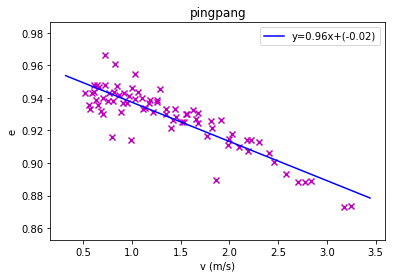

In [4]:
cate = 0
v = data[cate]['v']
e = data[cate]['e']

f1 = np.polyfit(v, e, 1)
p1 = np.poly1d(f1)
x = np.linspace(np.min(v)-0.2, np.max(v)+0.2)
y = p1(x)

plt.scatter(v, e, marker='x', c='m')
plt.plot(x, y, 'b', label='y={}x+({})'.format(round(f1[1], 2), round(f1[0], 2)))
plt.xlabel('v (m/s)')
plt.ylabel('e')
plt.title(ALL[0])
plt.legend()

print('average e', np.mean(e))
print('average v', np.mean(v))
print('average t', 2 * np.mean(v) / g)

# Process tracker data

In [5]:
filename = 'tracker.txt'
d = pd.read_csv(filename, sep='\t')
t = d['t'].values
y = d['y'].values
t[1:] -= t[:-1]

In [6]:
d

,t,y
0,0.100400,0.005333
1,0.033467,0.009140
2,0.033467,0.003429
3,0.033467,0.009140
4,0.033467,0.009140
5,0.033467,-0.009896
6,0.033467,-0.036546
7,0.033467,-0.076521
8,0.033467,-0.127918
9,0.033467,-0.200254


In [7]:
dx = 0.660919 - 0.754195
dt = 0.033467
v = dx / dt
print('final v:')

final v:


In [8]:
dy = np.array([0.75, 0.54, 0.40], dtype=np.float32)
v = np.sqrt(2 * g * dy)
v1 = v[:-1]
v2 = v[1:]
e = v2 / v1
print('original velocity : ', v1)
print('calculated e : ', e)
print('average e : {}'.format(np.mean(e)))

original velocity :  [3.8124795 3.2349963]
calculated e :  [0.8485282  0.86066294]
average e : 0.8545955419540405


In [11]:
r = 11.4 / (2 * np.pi * 100)
r = r / 100
r = 0.002156
k = 6 * np.pi * 0.0185 * r / (2.6 / 1000)
t1 = 0.033467 * 10
t2 = 0.033467 * 9

v1 = g / k * (1 - np.exp(-k * t1))
v2 = g / k * (1 - np.exp(-k * t2))
print('v fall in range [{}, {}]'.format(v2, v1))

v fall in range [2.7951638601874387, 3.090975104370642]
